In [20]:
import pandas as pd
import hashlib
import logging

# Configure structured logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# File paths
input_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Merged-Dataset-Final.csv"
output_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset.csv"

# Load dataset
df = pd.read_csv(input_path, low_memory=False)

# Generate a unique identifier for each row based on selected key columns
def generate_unique_id(row):
    hash_input = str(row.to_dict())  # Convert row to string format
    return hashlib.md5(hash_input.encode()).hexdigest()

logging.info("Generating unique identifiers for dataset...")
df["Unique_ID"] = df.apply(generate_unique_id, axis=1)

# Reorder columns to have Unique_ID first
df = df[["Unique_ID"] + [col for col in df.columns if col != "Unique_ID"]]

# Save indexed dataset
df.to_csv(output_path, index=False)
logging.info(f"Indexed dataset saved to: {output_path}")

2025-03-15 21:55:42,217 - INFO - Generating unique identifiers for dataset...
2025-03-15 21:58:01,040 - INFO - Indexed dataset saved to: /Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset.csv


In [28]:
import pandas as pd
import logging
import os

# Configure logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# File paths
input_file = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset.csv"
output_file = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"

# Load dataset
logging.info(f"Loading dataset from: {input_file}")
df = pd.read_csv(input_file, low_memory=False)

# Check if Timestamp column exists
if "Timestamp" not in df.columns:
    logging.error("Timestamp column not found. Ensure the dataset includes timestamps before running this script.")
    exit()

# Convert Timestamp column to datetime format
logging.info("Converting Timestamp column to datetime format...")
df["Timestamp"] = pd.to_datetime(df["Timestamp"], format="%d/%m/%Y %H:%M:%S", errors="coerce")

# Handle conversion errors
num_nulls = df["Timestamp"].isnull().sum()
if num_nulls > 0:
    logging.warning(f"{num_nulls} timestamps could not be converted. Replacing with the median timestamp.")
    median_time = df["Timestamp"].median()
    df["Timestamp"].fillna(median_time, inplace=True)

# Extract new time-based features
logging.info("Extracting time-based features...")
df["Hour"] = df["Timestamp"].dt.hour
df["Day"] = df["Timestamp"].dt.day
df["Month"] = df["Timestamp"].dt.month
df["Weekday"] = df["Timestamp"].dt.weekday  # 0 = Monday, 6 = Sunday

# Compute elapsed time since the first record
df["Elapsed_Time"] = (df["Timestamp"] - df["Timestamp"].min()).dt.total_seconds()

# Drop original Timestamp column if no longer needed
df.drop(columns=["Timestamp"], inplace=True)

# Save the processed dataset
logging.info(f"Saving processed dataset to: {output_file}")
df.to_csv(output_file, index=False)

logging.info("Timestamp processing completed successfully. Dataset is ready for further analysis.")

2025-03-15 22:45:24,460 - INFO - Loading dataset from: /Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset.csv
2025-03-15 22:45:45,303 - INFO - Converting Timestamp column to datetime format...
2025-03-15 22:45:45,542 - INFO - Extracting time-based features...
2025-03-15 22:45:46,028 - INFO - Saving processed dataset to: /Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv
2025-03-15 22:46:35,799 - INFO - Timestamp processing completed successfully. Dataset is ready for further analysis.


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure Seaborn for better visualization
sns.set_style("whitegrid")

# Define dataset path
dataset_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"
df = pd.read_csv(dataset_path)

# ============================
# 1. Dataset Overview
# ============================
print("Dataset Shape:", df.shape)

print("\nFirst 5 Rows of the Dataset:")
display(df.head())

print("\nColumn Names and Data Types:")
display(df.dtypes)

print("\nChecking for Missing Values:")
display(df.isnull().sum())

print("\nChecking for Duplicate Rows:")
print("Total Duplicate Rows:", df.duplicated().sum())

Dataset Shape: (2270317, 85)

First 5 Rows of the Dataset:


,Unique_ID,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Hour,Day,Month,Weekday,Elapsed_Time
0,1c26ebaefde66596cc3c298be777a338,443.0,6.0,94658.0,6.0,7.0,708.0,3718.0,387.0,0.0,...,0.0,0.0,0.0,0.0,Benign,8,28,2,2,1119271.0
1,bfb8cd0db2ba7dc420064158797f38a6,443.0,6.0,206.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Benign,8,28,2,2,1119271.0
2,0ef4f2a5a357de7cbde43100fb5d04f8,445.0,6.0,165505.0,3.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Benign,8,28,2,2,1119273.0
3,fb5e53288fc10f9e1bdc147faa56374a,443.0,6.0,102429.0,6.0,7.0,708.0,3718.0,387.0,0.0,...,0.0,0.0,0.0,0.0,Benign,8,28,2,2,1119274.0
4,15dd662e119e1bc4fe77eaffd22f6a43,443.0,6.0,167.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Benign,8,28,2,2,1119274.0



Column Names and Data Types:


Unique_ID         object
Dst Port         float64
Protocol         float64
Flow Duration    float64
Tot Fwd Pkts     float64
                  ...   
Hour               int64
Day                int64
Month              int64
Weekday            int64
Elapsed_Time     float64
Length: 85, dtype: object


Checking for Missing Values:


Unique_ID        0
Dst Port         0
Protocol         0
Flow Duration    0
Tot Fwd Pkts     0
                ..
Hour             0
Day              0
Month            0
Weekday          0
Elapsed_Time     0
Length: 85, dtype: int64


Checking for Duplicate Rows:
Total Duplicate Rows: 0


In [10]:
# ============================
# 2. Statistical Analysis
# ============================
print("\nStatistical Summary of Features:")
display(df.describe())


Statistical Summary of Features:


,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Hour,Day,Month,Weekday,Elapsed_Time
count,2.270317e+06,2.270317e+06,2.270317e+06,2.270317e+06,2.270317e+06,2.270317e+06,2.270317e+06,2.270317e+06,2.270317e+06,2.270317e+06,...,2.270317e+06,2.270317e+06,2.270317e+06,2.270317e+06,2.270317e+06,2.270317e+06,2.270317e+06,2270317.0,2.270317e+06,2.270317e+06
mean,6.154646e+03,8.398626e+00,1.557901e+07,4.465864e+01,6.681058e+00,1.667651e+03,5.548635e+03,1.370873e+02,1.007913e+01,3.623258e+01,...,9.571855e+04,8.651295e+06,1.723485e+05,8.824746e+06,8.491307e+06,7.833311e+00,2.338256e+01,2.0,2.685357e+00,7.201929e+05
std,1.565928e+04,4.672804e+00,3.166631e+07,2.328709e+03,2.272663e+02,1.251020e+05,3.155935e+05,2.492628e+02,2.709476e+01,5.425407e+01,...,1.664592e+06,2.042859e+07,1.769064e+06,2.066023e+07,2.035969e+07,3.620772e+00,3.198040e+00,0.0,1.280457e+00,2.725894e+05
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.500000e+01,2.0,1.000000e+00,0.000000e+00
25%,8.000000e+01,6.000000e+00,9.430000e+02,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,2.000000e+01,2.0,1.000000e+00,4.381340e+05
50%,8.000000e+01,6.000000e+00,1.122852e+06,2.000000e+00,1.000000e+00,3.100000e+01,9.700000e+01,3.100000e+01,0.000000e+00,1.900000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,2.300000e+01,2.0,2.000000e+00,6.886240e+05
75%,4.450000e+02,6.000000e+00,8.998500e+06,3.000000e+00,4.000000e+00,1.100000e+02,9.640000e+02,9.700000e+01,0.000000e+00,4.800000e+01,...,0.000000e+00,5.308489e+06,0.000000e+00,5.324609e+06,5.125622e+06,1.000000e+01,2.800000e+01,2.0,4.000000e+00,1.094945e+06
max,6.553400e+04,1.700000e+01,1.200000e+08,2.800430e+05,1.231180e+05,1.443918e+08,1.563604e+08,1.002400e+04,1.460000e+03,2.946679e+03,...,1.131927e+08,1.199916e+08,7.157844e+07,1.199916e+08,1.199916e+08,1.200000e+01,2.800000e+01,2.0,4.000000e+00,1.135937e+06


/var/folders/np/t44vfnk15zj6fnnj8h0mdmb40000gn/T/ipykernel_6334/459331032.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


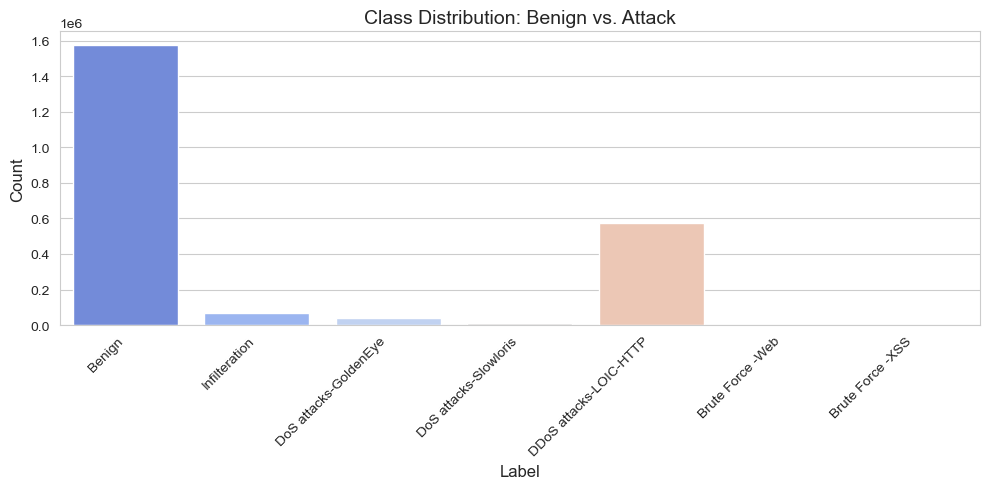


Class Distribution:
 Label
Benign                    1573665
DDoS attacks-LOIC-HTTP     576175
Infilteration               68224
DoS attacks-GoldenEye       41455
DoS attacks-Slowloris       10285
Brute Force -Web              362
Brute Force -XSS              151
Name: count, dtype: int64


In [14]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size and styling
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")

# Plot the class distribution with improved readability
ax = sns.countplot(data=df, x="Label", hue="Label", dodge=False, palette="coolwarm")

# Rotate x-axis labels for better visibility
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Set title and labels
plt.title("Class Distribution: Benign vs. Attack", fontsize=14)
plt.xlabel("Label", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Show plot with adjusted layout
plt.tight_layout()
plt.show()

# Print numerical class distribution for reference
print("\nClass Distribution:\n", df["Label"].value_counts())

In [4]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging

# Configure Logging for Tracking Execution
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# Set File Path
file_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Merged-Dataset-Final.csv"

#  Step 1: Load Dataset
logging.info(f"Loading dataset from: {file_path}")
df = pd.read_csv(file_path, low_memory=False)
logging.info(f"Dataset loaded successfully. Shape: {df.shape}")

#  Step 2: Display Basic Information
print("\n First 5 Rows of the Dataset:")
display(df.head())

#  Step 3: Check for Missing Values
missing_values = df.isnull().sum()
print("\n Missing Values Per Column:")
display(missing_values[missing_values > 0])

#  Step 4: Check for Duplicate Rows
num_duplicates = df.duplicated().sum()
logging.info(f"Number of Duplicate Rows: {num_duplicates}")

#  Step 5: Convert Timestamp to Datetime
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], format="%d/%m/%Y %H:%M:%S", errors="coerce")
    logging.info("Converted Timestamp to datetime format.")

#  Step 6: Split Dataset into Train and Test Sets (80% Training, 20% Testing)
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Label"], errors="ignore")  # Drop label column for features
y = df["Label"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

logging.info(f"Training Set Shape: {X_train.shape}, Testing Set Shape: {X_test.shape}")

2025-03-15 21:14:05,549 - INFO - Loading dataset from: /Users/akashthanneeru/Desktop/INADS_Data/Data/Merged-Dataset-Final.csv
2025-03-15 21:14:24,345 - INFO - Dataset loaded successfully. Shape: (2270317, 80)



 First 5 Rows of the Dataset:


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443.0,6.0,28/02/2018 08:22:13,94658.0,6.0,7.0,708.0,3718.0,387.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,443.0,6.0,28/02/2018 08:22:13,206.0,2.0,0.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,445.0,6.0,28/02/2018 08:22:15,165505.0,3.0,1.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,443.0,6.0,28/02/2018 08:22:16,102429.0,6.0,7.0,708.0,3718.0,387.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,443.0,6.0,28/02/2018 08:22:16,167.0,2.0,0.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign



 Missing Values Per Column:


Series([], dtype: int64)

2025-03-15 21:14:28,853 - INFO - Number of Duplicate Rows: 0
2025-03-15 21:14:29,073 - INFO - Converted Timestamp to datetime format.
2025-03-15 21:14:30,790 - INFO - Training Set Shape: (1816253, 79), Testing Set Shape: (454064, 79)


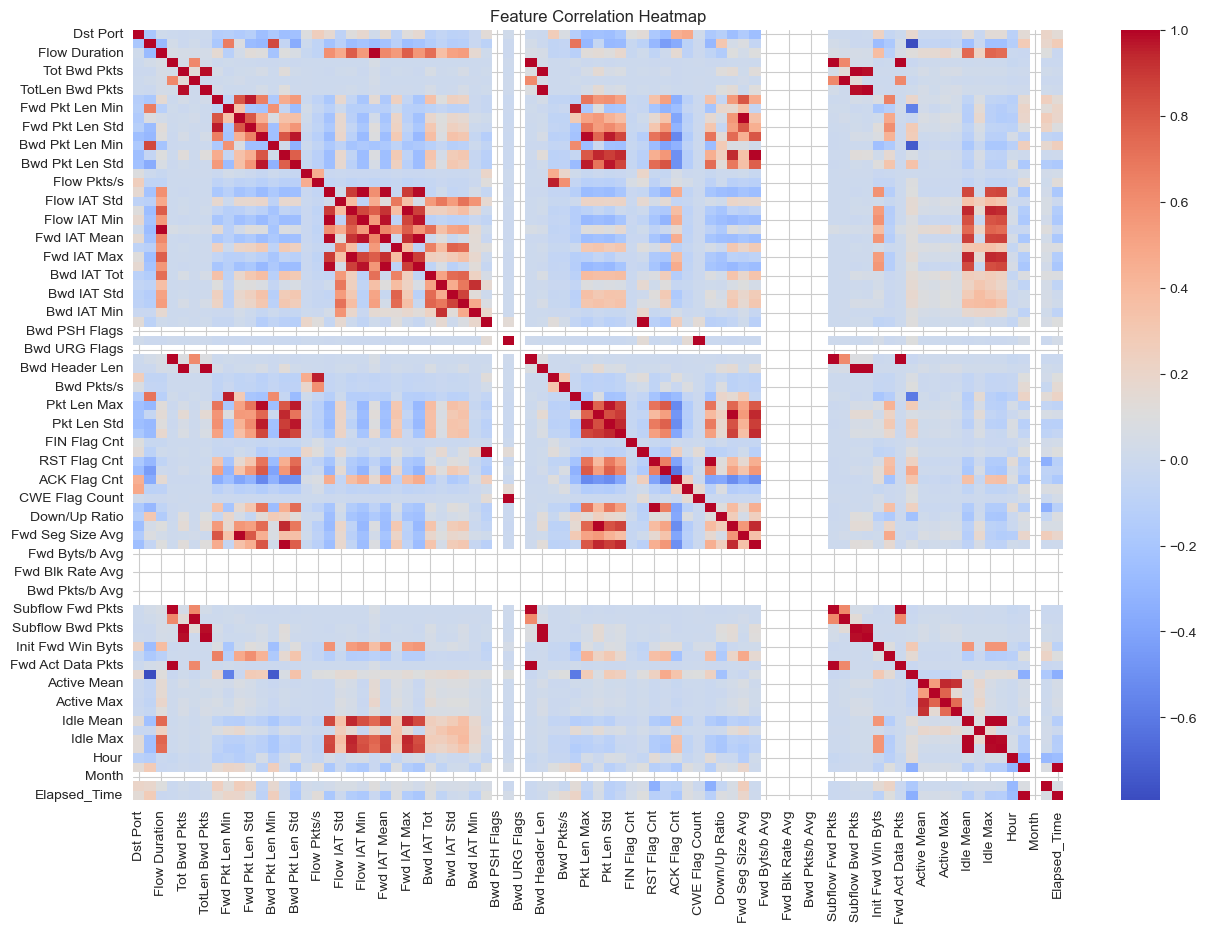


Highly Correlated Features saved to: Feature_Correlation_Matrix.csv


In [28]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (excluding Unique_ID)
dataset_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"
df = pd.read_csv(dataset_path).drop(columns=["Unique_ID"], errors="ignore")

# Ensure only numerical columns are selected for correlation matrix
df_numeric = df.select_dtypes(include=["number"])

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# Identify highly correlated features (correlation > 0.85)
threshold = 0.85
high_correlation_pairs = [
    (correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
    for i in range(len(correlation_matrix.columns)) for j in range(i)
    if abs(correlation_matrix.iloc[i, j]) > threshold
]

# Save highly correlated features
high_corr_df = pd.DataFrame(high_correlation_pairs, columns=["Feature 1", "Feature 2", "Correlation"])
high_corr_df.to_csv("/Users/akashthanneeru/Desktop/INADS_Data/Feature_Correlation_Matrix.csv", index=False)

print("\nHighly Correlated Features saved to: Feature_Correlation_Matrix.csv")

2025-03-16 00:41:08,733 - INFO - Loading dataset from: /Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv
2025-03-16 00:41:16,739 - INFO - Dataset loaded successfully. Shape: (2270317, 84)
2025-03-16 00:41:18,152 - INFO - Train-Test Split: Training Size: (1816253, 83), Testing Size: (454064, 83)
2025-03-16 00:41:18,152 - INFO - Finding optimal number of estimators using Out-of-Bag (OOB) score.
2025-03-16 00:42:08,264 - INFO - Evaluated n_estimators = 50 | OOB Score = 0.9505
2025-03-16 00:43:43,817 - INFO - Evaluated n_estimators = 100 | OOB Score = 0.9507
2025-03-16 00:46:10,732 - INFO - Evaluated n_estimators = 150 | OOB Score = 0.9508
2025-03-16 00:49:43,057 - INFO - Evaluated n_estimators = 200 | OOB Score = 0.9508
2025-03-16 00:54:07,679 - INFO - Evaluated n_estimators = 250 | OOB Score = 0.9508
2025-03-16 01:02:30,289 - INFO - Evaluated n_estimators = 300 | OOB Score = 0.9508
2025-03-16 01:02:30,291 - INFO - Optimal number of estimators found: 30

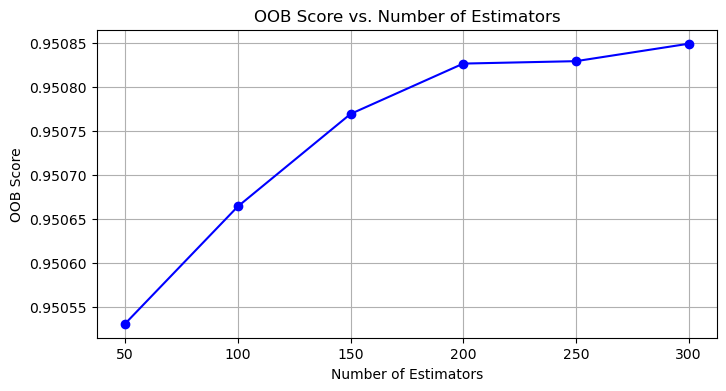

In [1]:
# Import necessary libraries
import pandas as pd
import logging
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Configure logging
logging.basicConfig(format="%(asctime)s - %(levelname)s - %(message)s", level=logging.INFO)

# Define dataset path
dataset_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"

# Load dataset
logging.info("Loading dataset from: %s", dataset_path)
df = pd.read_csv(dataset_path).drop(columns=["Unique_ID"], errors="ignore")
logging.info("Dataset loaded successfully. Shape: %s", df.shape)

# Separate features and labels
X = df.select_dtypes(include=["number"]).drop(columns=["Label"], errors="ignore")
y = df["Label"].astype("category").cat.codes  # Encode labels

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
logging.info("Train-Test Split: Training Size: %s, Testing Size: %s", X_train.shape, X_test.shape)

# **Auto-Tune Number of Estimators Using OOB Score**
logging.info("Finding optimal number of estimators using Out-of-Bag (OOB) score.")

oob_scores = []
estimator_range = list(range(50, 301, 50))  # Test estimators from 50 to 300 in increments of 50

for n_estimators in estimator_range:
    rf = RandomForestClassifier(n_estimators=n_estimators, oob_score=True, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    oob_scores.append((n_estimators, rf.oob_score_))
    logging.info("Evaluated n_estimators = %s | OOB Score = %.4f", n_estimators, rf.oob_score_)

# **Find the best estimator count based on highest OOB score**
best_n_estimators = max(oob_scores, key=lambda x: x[1])[0]
best_oob_score = max(oob_scores, key=lambda x: x[1])[1]
logging.info("Optimal number of estimators found: %s (OOB Score = %.4f)", best_n_estimators, best_oob_score)

# **Plot OOB Scores**
plt.figure(figsize=(8, 4))
plt.plot(estimator_range, [score[1] for score in oob_scores], marker="o", linestyle="-", color="b")
plt.xlabel("Number of Estimators")
plt.ylabel("OOB Score")
plt.title("OOB Score vs. Number of Estimators")
plt.grid()
plt.savefig("/Users/akashthanneeru/Desktop/INADS_Data/OOB_Estimator_Selection.png")
logging.info("OOB Score plot saved.")

# **Train Final Model with Best Estimator Count**
logging.info("Training Random Forest with optimal estimators: %s", best_n_estimators)
rf_model = RandomForestClassifier(n_estimators=best_n_estimators, oob_score=True, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Save Model
model_path = "/Users/akashthanneeru/Desktop/INADS_Data/Trained_RandomForest_Model.pkl"
joblib.dump(rf_model, model_path)
logging.info("Trained Random Forest Model saved to: %s", model_path)
logging.info("Final Model OOB Score: %.4f", rf_model.oob_score_)

logging.info("Model Training Completed Successfully.")

2025-03-16 01:20:51,234 - INFO - Starting Random Forest Model Evaluation
2025-03-16 01:20:51,235 - INFO - Loading dataset from: /Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv
2025-03-16 01:21:01,359 - INFO - Converted Label column to string format for consistency.
2025-03-16 01:21:01,518 - INFO - Created new label encoder and saved.
2025-03-16 01:21:01,519 - INFO - Loading trained model from: /Users/akashthanneeru/Desktop/INADS_Data/Trained_RandomForest_Model.pkl
2025-03-16 01:21:04,509 - INFO - Generating predictions...
2025-03-16 01:21:13,491 - INFO - Generating Classification Report...


Classification Report:



2025-03-16 01:21:51,034 - INFO - Generating Confusion Matrix...


                        precision    recall  f1-score   support

                Benign       0.98      0.99      0.98   1573665
      Brute Force -Web       1.00      0.96      0.98       362
      Brute Force -XSS       1.00      0.95      0.98       151
DDoS attacks-LOIC-HTTP       1.00      1.00      1.00    576175
 DoS attacks-GoldenEye       1.00      1.00      1.00     41455
 DoS attacks-Slowloris       1.00      1.00      1.00     10285
         Infilteration       0.59      0.45      0.51     68224

              accuracy                           0.97   2270317
             macro avg       0.94      0.91      0.92   2270317
          weighted avg       0.97      0.97      0.97   2270317



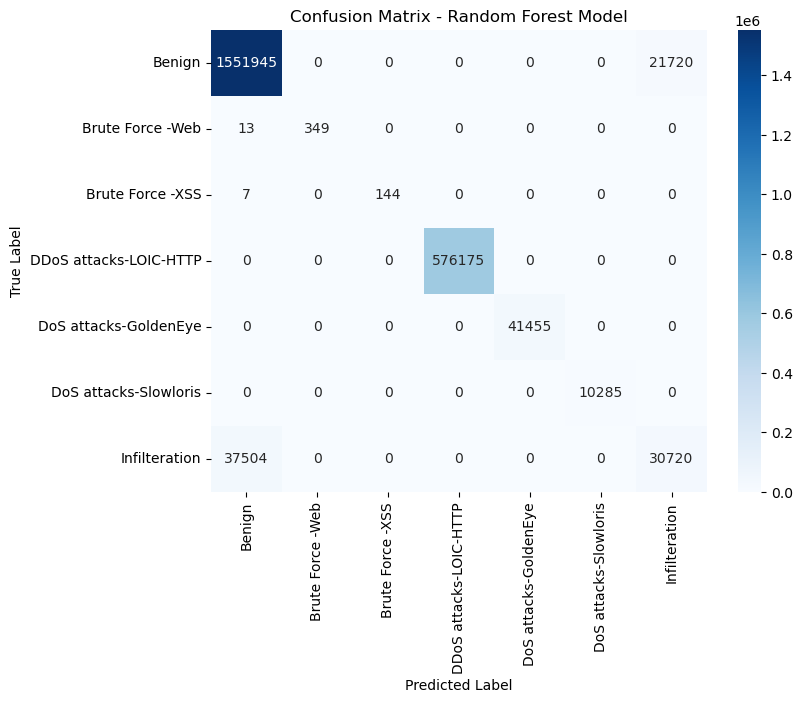

2025-03-16 01:21:55,076 - INFO - Confusion Matrix displayed successfully.
2025-03-16 01:21:55,076 - INFO - Computing Feature Importance...
/var/folders/np/t44vfnk15zj6fnnj8h0mdmb40000gn/T/ipykernel_8686/2339744941.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance["Importance"], y=feature_importance["Feature"], palette="coolwarm")


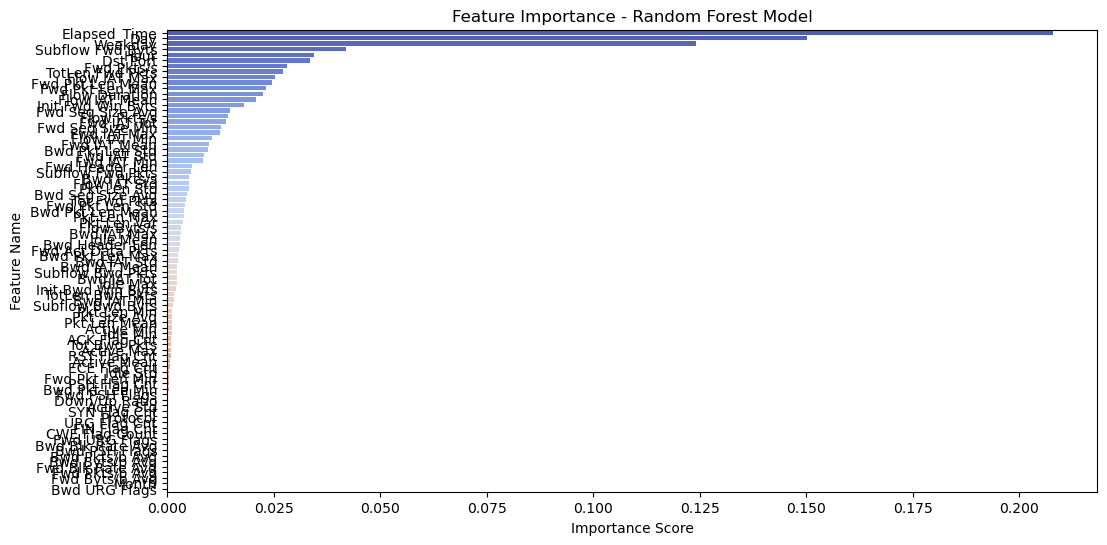

2025-03-16 01:21:55,448 - INFO - Feature Importance plot displayed successfully.
2025-03-16 01:21:55,450 - INFO - Feature Importance saved to: /Users/akashthanneeru/Desktop/INADS_Data/Feature_Importance_RandomForest.csv
2025-03-16 01:21:55,450 - INFO - Model Evaluation Completed Successfully.


In [10]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import logging
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Set up logging
logging.basicConfig(format="%(asctime)s - %(levelname)s - %(message)s", level=logging.INFO)
logging.info("Starting Random Forest Model Evaluation")

# Set dataset path
dataset_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"

# Load dataset (excluding Unique_ID)
logging.info(f"Loading dataset from: {dataset_path}")
df = pd.read_csv(dataset_path).drop(columns=["Unique_ID"], errors="ignore")

# Convert Label column to string format
df["Label"] = df["Label"].astype(str)
logging.info("Converted Label column to string format for consistency.")

# Encode Labels (Ensure the mapping used during training is retrieved)
label_encoder_path = "/Users/akashthanneeru/Desktop/INADS_Data/Label_Encoder.pkl"
try:
    label_encoder = joblib.load(label_encoder_path)
    logging.info("Loaded existing label encoder.")
except FileNotFoundError:
    label_encoder = LabelEncoder()
    df["Label"] = label_encoder.fit_transform(df["Label"])
    joblib.dump(label_encoder, label_encoder_path)
    logging.info("Created new label encoder and saved.")

# Load trained Random Forest Model
model_path = "/Users/akashthanneeru/Desktop/INADS_Data/Trained_RandomForest_Model.pkl"
logging.info(f"Loading trained model from: {model_path}")
rf_model = joblib.load(model_path)

# Extract features and labels
X = df.drop(columns=["Label"])
y = df["Label"]

# Generate predictions
logging.info("Generating predictions...")
y_pred = rf_model.predict(X)

# Decode predicted labels back to original text format
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_true_decoded = label_encoder.inverse_transform(y)

# ============================
# 1. Classification Report
# ============================
logging.info("Generating Classification Report...")
print("Classification Report:\n")
print(classification_report(y_true_decoded, y_pred_decoded))

# ============================
# 2. Confusion Matrix
# ============================
logging.info("Generating Confusion Matrix...")
conf_matrix = confusion_matrix(y_true_decoded, y_pred_decoded)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest Model")
plt.show()
logging.info("Confusion Matrix displayed successfully.")

# ============================
# 3. Feature Importance
# ============================
logging.info("Computing Feature Importance...")
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance["Importance"], y=feature_importance["Feature"], palette="coolwarm")
plt.title("Feature Importance - Random Forest Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()
logging.info("Feature Importance plot displayed successfully.")

# Save feature importance results
feature_importance_path = "/Users/akashthanneeru/Desktop/INADS_Data/Feature_Importance_RandomForest.csv"
feature_importance.to_csv(feature_importance_path, index=False)
logging.info(f"Feature Importance saved to: {feature_importance_path}")

logging.info("Model Evaluation Completed Successfully.")

2025-03-16 01:43:39,821 - INFO - Loading trained model from: /Users/akashthanneeru/Desktop/INADS_Data/Trained_RandomForest_Model.pkl
2025-03-16 01:43:42,585 - INFO - Loading dataset from: /Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv
/var/folders/np/t44vfnk15zj6fnnj8h0mdmb40000gn/T/ipykernel_8686/714552954.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features["Importance"], y=top_features["Feature"], palette="coolwarm")


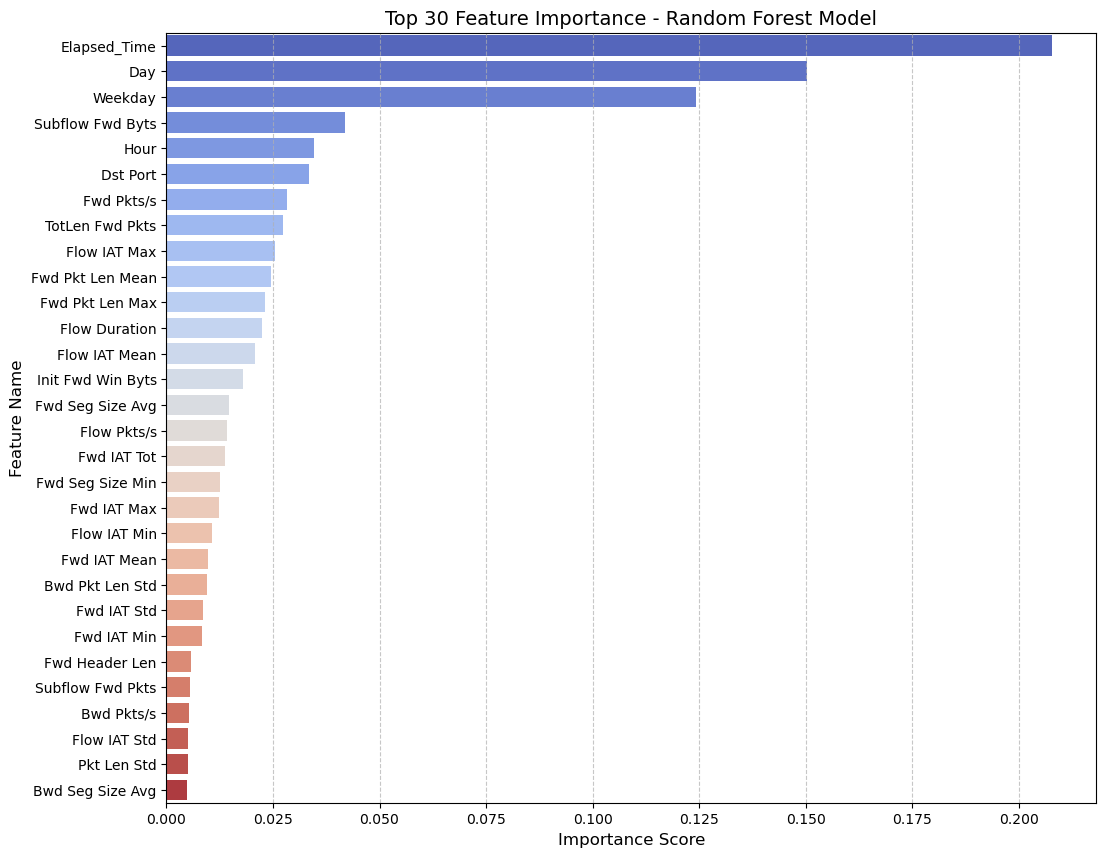

2025-03-16 01:43:52,585 - INFO - Feature Importance saved to: /Users/akashthanneeru/Desktop/INADS_Data/Feature_Importance_RandomForest.csv


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import logging

# Set up logging
logging.basicConfig(format="%(asctime)s - %(levelname)s - %(message)s", level=logging.INFO)

# Load trained Random Forest model
model_path = "/Users/akashthanneeru/Desktop/INADS_Data/Trained_RandomForest_Model.pkl"
logging.info(f"Loading trained model from: {model_path}")
rf_model = joblib.load(model_path)

# Load dataset (excluding Unique_ID and Label)
dataset_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"
logging.info(f"Loading dataset from: {dataset_path}")
df = pd.read_csv(dataset_path).drop(columns=["Unique_ID", "Label"], errors="ignore")

# Extract feature importances
feature_importance = pd.DataFrame({
    "Feature": df.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Limit to Top 30 Features for better readability
top_features = feature_importance[:30]

# Plot Feature Importance
plt.figure(figsize=(12, 10))
sns.barplot(x=top_features["Importance"], y=top_features["Feature"], palette="coolwarm")

# Formatting
plt.title("Top 30 Feature Importance - Random Forest Model", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature Name", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show plot
plt.show()

# Save feature importance results
feature_importance_path = "/Users/akashthanneeru/Desktop/INADS_Data/Feature_Importance_RandomForest.csv"
feature_importance.to_csv(feature_importance_path, index=False)
logging.info(f"Feature Importance saved to: {feature_importance_path}")

2025-03-16 22:21:47,959 - INFO - Starting Feature Correlation Analysis.
2025-03-16 22:21:47,960 - INFO - Loading dataset from: /Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv
2025-03-16 22:21:57,024 - INFO - Computing feature correlation matrix.
2025-03-16 22:21:59,748 - INFO - Identified highly correlated feature pairs:
2025-03-16 22:21:59,748 - INFO - Fwd IAT Mean - Flow IAT Mean (Correlation: 0.99)
2025-03-16 22:22:00,593 - INFO - Feature Correlation Heatmap saved.
2025-03-16 22:22:00,594 - INFO - Feature Correlation Analysis Completed Successfully.


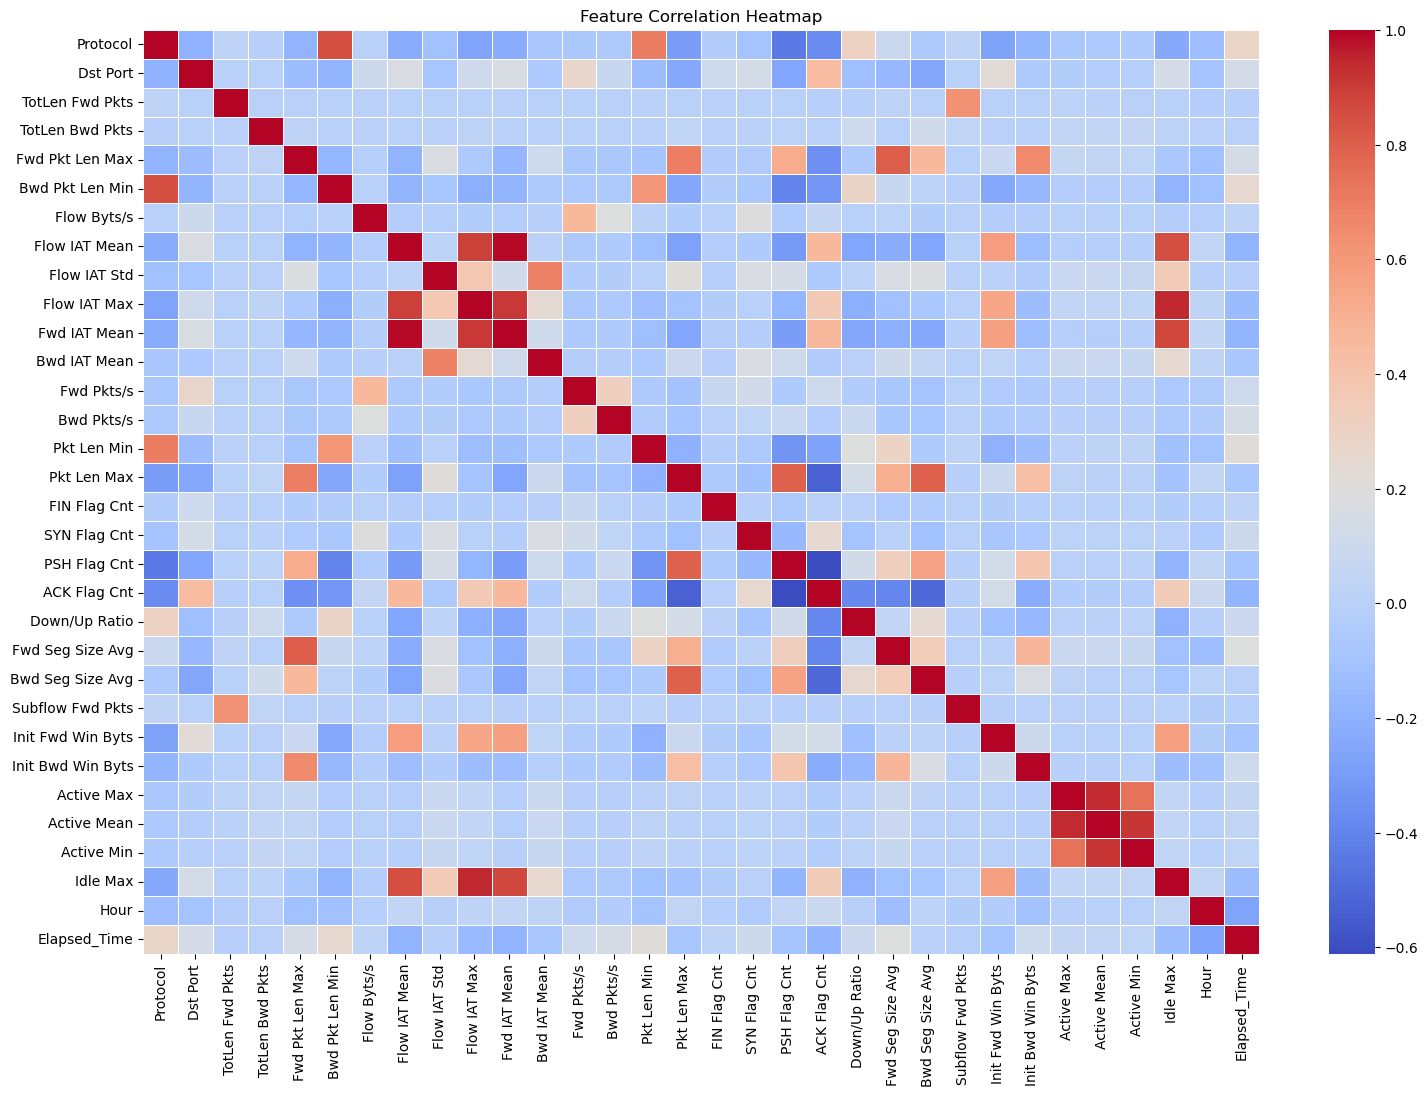

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import logging

# Configure logging for tracking execution progress
logging.basicConfig(format="%(asctime)s - %(levelname)s - %(message)s", level=logging.INFO)
logging.info("Starting Feature Correlation Analysis.")

# Define dataset path
dataset_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"

# Load dataset and retain only selected features
logging.info(f"Loading dataset from: {dataset_path}")
df = pd.read_csv(dataset_path)

# Define the selected features for analysis
selected_features = [
    "Protocol", "Dst Port", "TotLen Fwd Pkts", "TotLen Bwd Pkts", "Fwd Pkt Len Max", "Bwd Pkt Len Min",
    "Flow Byts/s", "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max",
    "Fwd IAT Mean", "Bwd IAT Mean", "Fwd Pkts/s", "Bwd Pkts/s", "Pkt Len Min", "Pkt Len Max",
    "FIN Flag Cnt", "SYN Flag Cnt", "PSH Flag Cnt", "ACK Flag Cnt", "Down/Up Ratio",
    "Fwd Seg Size Avg", "Bwd Seg Size Avg", "Subflow Fwd Pkts", "Init Fwd Win Byts", "Init Bwd Win Byts",
    "Active Max", "Active Mean", "Active Min", "Idle Max",
    "Hour", "Elapsed_Time"
]

# Retain only selected features
df = df[selected_features]

# Compute correlation matrix
logging.info("Computing feature correlation matrix.")
correlation_matrix = df.corr()

# Identify highly correlated features (correlation > 0.95)
highly_correlated_pairs = []
threshold = 0.95

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            correlation_value = correlation_matrix.iloc[i, j]
            highly_correlated_pairs.append((feature1, feature2, correlation_value))

# Display highly correlated feature pairs
if highly_correlated_pairs:
    logging.info("Identified highly correlated feature pairs:")
    for feature1, feature2, correlation_value in highly_correlated_pairs:
        logging.info(f"{feature1} - {feature2} (Correlation: {correlation_value:.2f})")
else:
    logging.info("No highly correlated features detected above threshold.")

# Generate correlation heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.savefig("/Users/akashthanneeru/Desktop/INADS_Data/Feature_Correlation_Heatmap.png", dpi=300)
logging.info("Feature Correlation Heatmap saved.")

logging.info("Feature Correlation Analysis Completed Successfully.")

2025-03-17 02:12:04,312 - INFO - Starting Per-Layer Correlation Analysis.
2025-03-17 02:12:04,313 - INFO - Loading dataset from: /Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv
2025-03-17 02:12:14,086 - INFO - Computing correlation matrix for Global Layer...


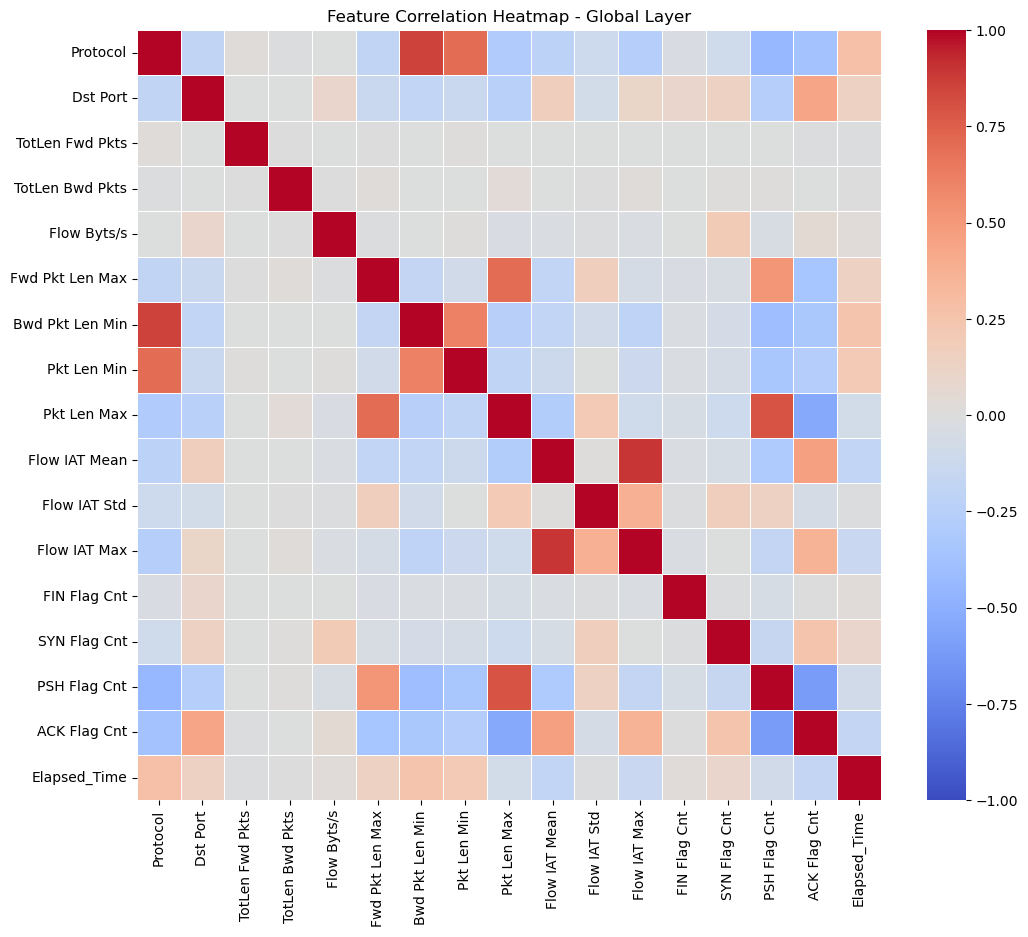

2025-03-17 02:12:15,566 - INFO - Feature Correlation Heatmap saved for Global Layer: /Users/akashthanneeru/Desktop/INADS_Data/Feature_Correlation_Global.png
2025-03-17 02:12:15,567 - INFO - Computing correlation matrix for Edge Layer...


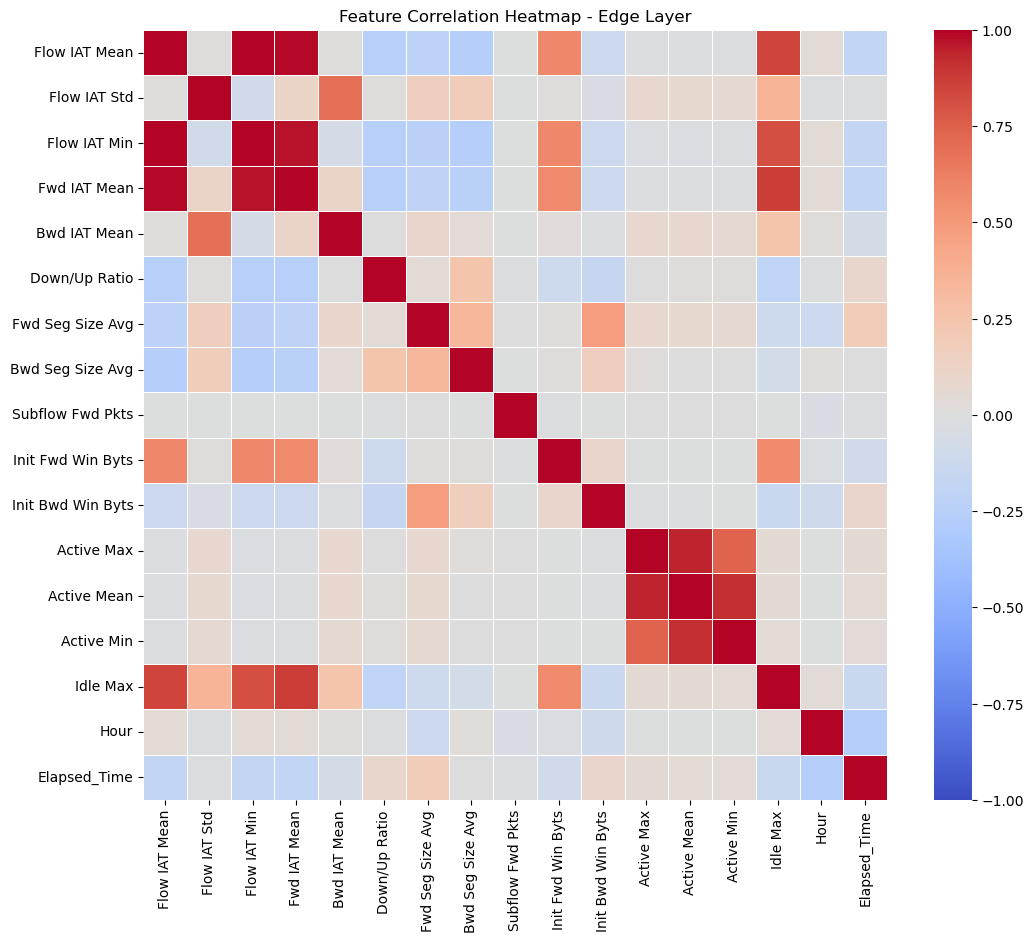

2025-03-17 02:12:17,023 - INFO - Feature Correlation Heatmap saved for Edge Layer: /Users/akashthanneeru/Desktop/INADS_Data/Feature_Correlation_Edge.png
2025-03-17 02:12:17,023 - INFO - Computing correlation matrix for Device Layer...


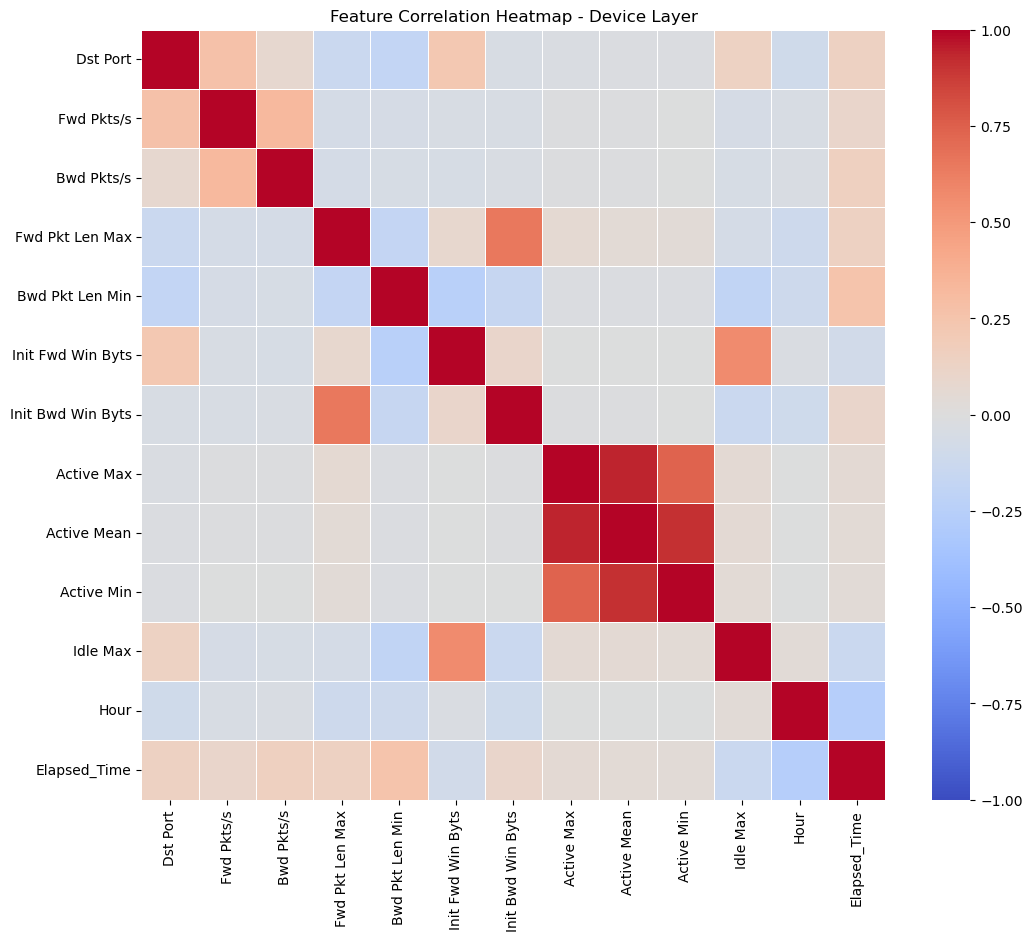

2025-03-17 02:12:18,088 - INFO - Feature Correlation Heatmap saved for Device Layer: /Users/akashthanneeru/Desktop/INADS_Data/Feature_Correlation_Device.png
2025-03-17 02:12:18,088 - INFO - Per-Layer Correlation Analysis Completed Successfully.


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import logging

# Configure Logging
logging.basicConfig(format="%(asctime)s - %(levelname)s - %(message)s", level=logging.INFO)
logging.info("Starting Per-Layer Correlation Analysis.")

# Load Dataset
dataset_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"
logging.info(f"Loading dataset from: {dataset_path}")
df = pd.read_csv(dataset_path)

# Define Per-Layer Feature Sets
global_features = [
    "Protocol", "Dst Port", "TotLen Fwd Pkts", "TotLen Bwd Pkts", "Flow Byts/s",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min", "Pkt Len Min", "Pkt Len Max",
    "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max",
    "FIN Flag Cnt", "SYN Flag Cnt", "PSH Flag Cnt", "ACK Flag Cnt",
    "Elapsed_Time"
]

edge_features = [
    "Flow IAT Mean", "Flow IAT Std", "Flow IAT Min", "Fwd IAT Mean", "Bwd IAT Mean",
    "Down/Up Ratio", "Fwd Seg Size Avg", "Bwd Seg Size Avg", "Subflow Fwd Pkts",
    "Init Fwd Win Byts", "Init Bwd Win Byts",
    "Active Max", "Active Mean", "Active Min", "Idle Max",
    "Hour", "Elapsed_Time"
]

device_features = [
    "Dst Port", "Fwd Pkts/s", "Bwd Pkts/s",
    "Fwd Pkt Len Max", "Bwd Pkt Len Min",
    "Init Fwd Win Byts", "Init Bwd Win Byts",
    "Active Max", "Active Mean", "Active Min", "Idle Max",
    "Hour", "Elapsed_Time"
]

# Define a function to compute and plot correlation heatmaps
def plot_correlation_matrix(features, layer_name):
    logging.info(f"Computing correlation matrix for {layer_name} Layer...")
    df_layer = df[features].corr()

    # Plot correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(df_layer, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
    plt.title(f"Feature Correlation Heatmap - {layer_name} Layer")
    heatmap_path = f"/Users/akashthanneeru/Desktop/INADS_Data/Feature_Correlation_{layer_name}.png"
    plt.savefig(heatmap_path, dpi=300)
    plt.show()
    
    logging.info(f"Feature Correlation Heatmap saved for {layer_name} Layer: {heatmap_path}")

# Run Correlation Checks for Each Layer
plot_correlation_matrix(global_features, "Global")
plot_correlation_matrix(edge_features, "Edge")
plot_correlation_matrix(device_features, "Device")

logging.info("Per-Layer Correlation Analysis Completed Successfully.")

2025-03-17 02:41:07,571 - INFO - Starting Random Forest Training - Global Layer.
2025-03-17 02:42:09,625 - INFO - Global Model Training Completed in 50.71 seconds.
/var/folders/np/t44vfnk15zj6fnnj8h0mdmb40000gn/T/ipykernel_2872/1066885663.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="Blues_r")
2025-03-17 02:42:16,973 - INFO - Global Model Accuracy: 0.9493, Precision: 0.9476, Recall: 0.9493, F1-Score: 0.9485
2025-03-17 02:42:18,182 - INFO - Global Model Training Completed Successfully.


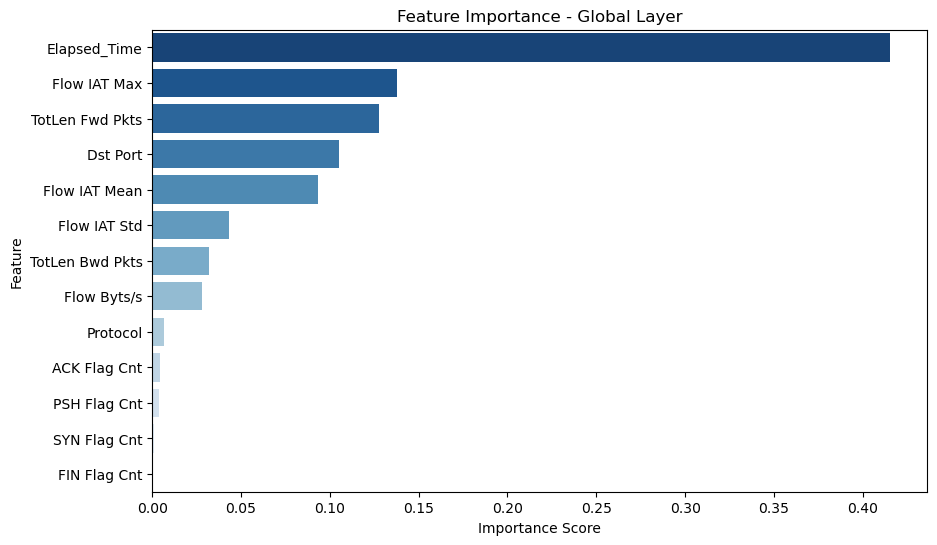

In [8]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import time
import logging
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Configure logging
logging.basicConfig(format="%(asctime)s - %(levelname)s - %(message)s", level=logging.INFO)
logging.info("Starting Random Forest Training - Global Layer.")

# Load dataset
dataset_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"
df = pd.read_csv(dataset_path)
df["Label"] = df["Label"].astype(str)

# Define features for the Global Layer
features_global = [
    "Protocol", "Dst Port", "TotLen Fwd Pkts", "TotLen Bwd Pkts", "Flow Byts/s", 
    "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max", "FIN Flag Cnt", 
    "SYN Flag Cnt", "PSH Flag Cnt", "ACK Flag Cnt", "Elapsed_Time"
]

X = df[features_global]
y = df["Label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
logging.info(f"Global Model Training Completed in {round(end_time - start_time, 2)} seconds.")

# Feature Importance
feature_importance = model.feature_importances_
importance_df = pd.DataFrame({"Feature": features_global, "Importance": feature_importance}).sort_values(by="Importance", ascending=False)

# Save Feature Importance Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="Blues_r")
plt.title("Feature Importance - Global Layer")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.savefig("/Users/akashthanneeru/Desktop/INADS_Data/Feature_Importance_Global.png", dpi=300)

# Model Evaluation
y_pred = model.predict(X_test)
logging.info(f"Global Model Accuracy: {accuracy_score(y_test, y_pred):.4f}, Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}, Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}, F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

# Save Model
joblib.dump(model, "/Users/akashthanneeru/Desktop/INADS_Data/RandomForest_Global.pkl")
logging.info("Global Model Training Completed Successfully.")

2025-03-17 02:42:18,253 - INFO - Starting Random Forest Training - Edge Layer.
2025-03-17 02:43:24,656 - INFO - Edge Model Training Completed in 55.84 seconds.
/var/folders/np/t44vfnk15zj6fnnj8h0mdmb40000gn/T/ipykernel_2872/1696575095.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="Blues_r")
2025-03-17 02:43:31,733 - INFO - Edge Model Accuracy: 0.9508, Precision: 0.9495, Recall: 0.9508, F1-Score: 0.9501
2025-03-17 02:43:32,892 - INFO - Edge Model Training Completed Successfully.


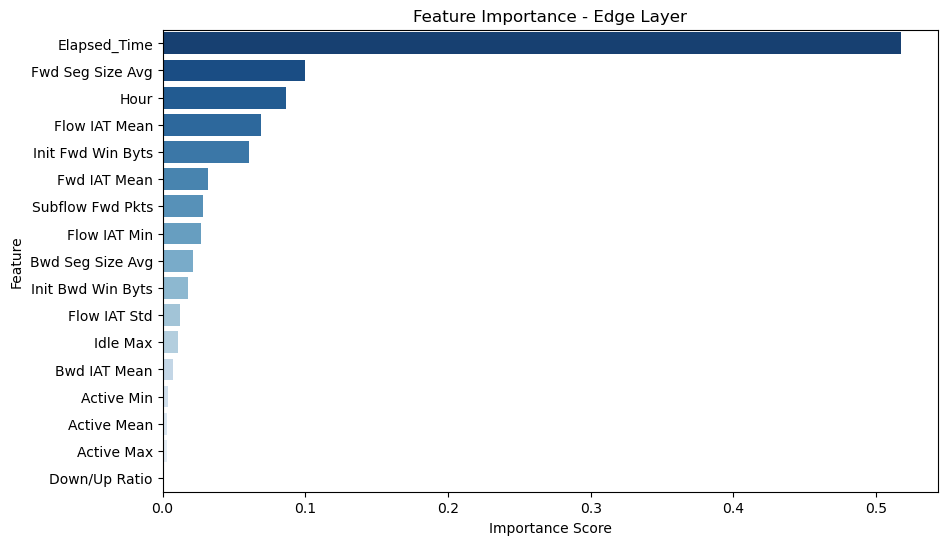

In [9]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import time
import logging
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Configure logging
logging.basicConfig(format="%(asctime)s - %(levelname)s - %(message)s", level=logging.INFO)
logging.info("Starting Random Forest Training - Edge Layer.")

# Load dataset
dataset_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"
df = pd.read_csv(dataset_path)
df["Label"] = df["Label"].astype(str)

# Define features for the Edge Layer
features_edge = [
    "Flow IAT Mean", "Flow IAT Std", "Flow IAT Min", "Fwd IAT Mean", "Bwd IAT Mean",
    "Down/Up Ratio", "Fwd Seg Size Avg", "Bwd Seg Size Avg", "Subflow Fwd Pkts",
    "Init Fwd Win Byts", "Init Bwd Win Byts", "Active Max", "Active Mean", 
    "Active Min", "Idle Max", "Hour", "Elapsed_Time"
]

X = df[features_edge]
y = df["Label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
logging.info(f"Edge Model Training Completed in {round(end_time - start_time, 2)} seconds.")

# Feature Importance
feature_importance = model.feature_importances_
importance_df = pd.DataFrame({"Feature": features_edge, "Importance": feature_importance}).sort_values(by="Importance", ascending=False)

# Save Feature Importance Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="Blues_r")
plt.title("Feature Importance - Edge Layer")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.savefig("/Users/akashthanneeru/Desktop/INADS_Data/Feature_Importance_Edge.png", dpi=300)

# Model Evaluation
y_pred = model.predict(X_test)
logging.info(f"Edge Model Accuracy: {accuracy_score(y_test, y_pred):.4f}, Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}, Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}, F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

# Save Model
joblib.dump(model, "/Users/akashthanneeru/Desktop/INADS_Data/RandomForest_Edge.pkl")
logging.info("Edge Model Training Completed Successfully.")

2025-03-17 07:28:01,859 - INFO - Starting Random Forest Training - Device Layer.
2025-03-17 07:28:52,820 - INFO - Device Model Training Completed in 39.9 seconds.
/var/folders/np/t44vfnk15zj6fnnj8h0mdmb40000gn/T/ipykernel_2872/3042316482.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="Blues_r")
2025-03-17 07:28:59,630 - INFO - Edge Model Accuracy: 0.9489, Precision: 0.9475, Recall: 0.9489, F1-Score: 0.9482
2025-03-17 07:29:01,244 - INFO - Device Model Training Completed Successfully.


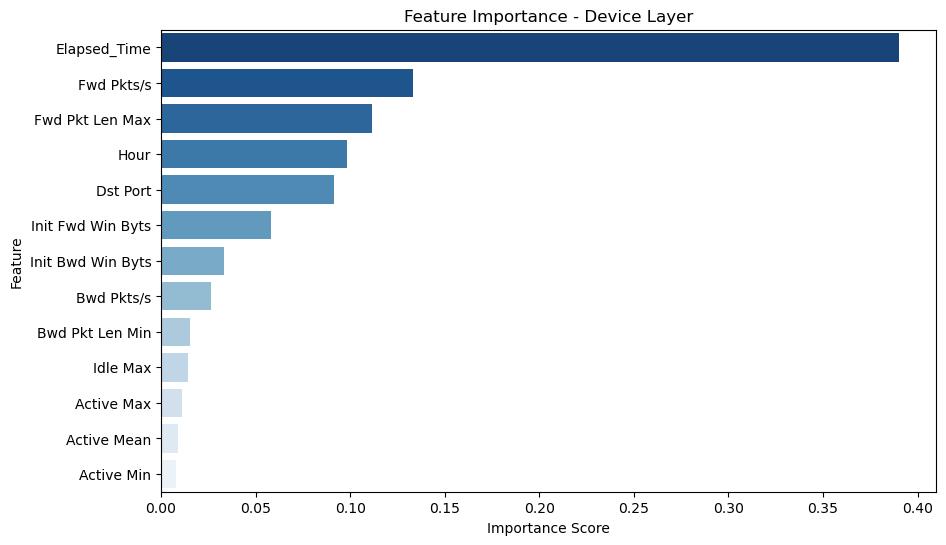

In [14]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import time
import logging
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Configure logging
logging.basicConfig(format="%(asctime)s - %(levelname)s - %(message)s", level=logging.INFO)
logging.info("Starting Random Forest Training - Device Layer.")

# Load dataset
dataset_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"
df = pd.read_csv(dataset_path)
df["Label"] = df["Label"].astype(str)

# Define features for the Device Layer
features_device = [
    "Dst Port", "Fwd Pkts/s", "Bwd Pkts/s", "Fwd Pkt Len Max", "Bwd Pkt Len Min",
    "Init Fwd Win Byts", "Init Bwd Win Byts", "Active Max", "Active Mean", 
    "Active Min", "Idle Max", "Hour", "Elapsed_Time"
]

X = df[features_device]
y = df["Label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
logging.info(f"Device Model Training Completed in {round(end_time - start_time, 2)} seconds.")

# Feature Importance
feature_importance = model.feature_importances_
importance_df = pd.DataFrame({"Feature": features_device, "Importance": feature_importance}).sort_values(by="Importance", ascending=False)

# Save Feature Importance Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="Blues_r")
plt.title("Feature Importance - Device Layer")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.savefig("/Users/akashthanneeru/Desktop/INADS_Data/Feature_Importance_Device.png", dpi=300)

# Model Evaluation
y_pred = model.predict(X_test)
logging.info(f"Edge Model Accuracy: {accuracy_score(y_test, y_pred):.4f}, Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}, Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}, F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")


# Save Model
joblib.dump(model, "/Users/akashthanneeru/Desktop/INADS_Data/RandomForest_Device.pkl")
logging.info("Device Model Training Completed Successfully.")

In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load Dataset
data_path = "/Users/akashthanneeru/Desktop/INADS_Data/Data/Indexed_Dataset_Timestamp_Processed.csv"
df = pd.read_csv(data_path)

# Define Label Column (Assuming 'Label' is the target variable)
label_col = 'Label'

# Define Features: Baseline (Current Set)
baseline_features = [
    "Dst Port", "TotLen Fwd Pkts", "TotLen Bwd Pkts", "Fwd Pkt Len Max", "Bwd Pkt Len Min",
    "Flow Byts/s", "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max", "Fwd IAT Mean",
    "Bwd IAT Mean", "Fwd Pkts/s", "Bwd Pkts/s", "Pkt Len Min", "Pkt Len Max",
    "FIN Flag Cnt", "SYN Flag Cnt", "PSH Flag Cnt", "ACK Flag Cnt", "Down/Up Ratio",
    "Fwd Seg Size Avg", "Bwd Seg Size Avg", "Subflow Fwd Pkts", "Init Fwd Win Byts",
    "Init Bwd Win Byts", "Active Max", "Active Mean", "Active Min", "Idle Max", "Hour", "Elapsed_Time"
]

# Define Features: Expanded Set (Adding Back Previously Dropped Features)
expanded_features = baseline_features + [
    "Protocol", "Flow Duration", "Fwd Pkt Len Mean", "Pkt Len Std", "RST Flag Cnt", "Idle Mean"
]

# Train & Evaluate Function
def train_evaluate(features, dataset, model_name):
    """
    Train Random Forest Model and Evaluate Performance
    """
    X = dataset[features]
    y = dataset[label_col]

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Random Forest Model
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    # Predictions
    y_pred = clf.predict(X_test)

    # Compute Performance Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Print Results
    print(f" {model_name} - Performance Metrics")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}\n")

    return clf, accuracy, precision, recall, f1

# Train Baseline Model
print("Training Baseline Model (Current Features)...")
baseline_model, base_acc, base_prec, base_recall, base_f1 = train_evaluate(baseline_features, df, "Baseline Model")

# Train Expanded Model
print("Training Expanded Model (With Dropped Features)...")
expanded_model, exp_acc, exp_prec, exp_recall, exp_f1 = train_evaluate(expanded_features, df, "Expanded Model")

# Compare Performance
print(" **Comparison of Baseline vs. Expanded Model**")
print(f" Accuracy Change: {exp_acc - base_acc:.4f}")
print(f" Precision Change: {exp_prec - base_prec:.4f}")
print(f" Recall Change: {exp_recall - base_recall:.4f}")
print(f" F1-Score Change: {exp_f1 - base_f1:.4f}")

# Feature Importance Analysis
def plot_feature_importance(model, features, title):
    """
    Plot Feature Importance from Trained Model
    """
    feature_importance = model.feature_importances_
    importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
    importance_df = importance_df.sort_values(by="Importance", ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x="Importance", y="Feature", data=importance_df, palette="Blues_r")
    plt.title(title)
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.show()

# Plot Feature Importance for Expanded Model
plot_feature_importance(expanded_model, expanded_features, "Feature Importance - Expanded Model")

Training Baseline Model (Current Features)...
 Baseline Model - Performance Metrics
Accuracy: 0.9497
Precision: 0.8704
Recall: 0.8499
F1-Score: 0.8597

Training Expanded Model (With Dropped Features)...
